# Support Vector Machines
Another essential tool to have as a Data Scientist is a Support Vector Machine (SVM).  The simplest of SVMs work by finding a pair of parallel lines that separate the data while maximizing the *margin* between the lines.  This concept can be extended to not only lines, but any curve through the use of kernels.  In this exercise, you'll use SVMs for both classification and regression tasks.

## Linear SVM
As discussed above, the simplest of SVMs work by finding a pair of straight lines, or hyperplanes, which separate the data into two categories while maximizing the distance between them.  Analytically, the hyperplanes can be described by the equations $${\vec {w}}\cdot {\vec {x}}-b=1$$ and $${\vec {w}}\cdot {\vec {x}}-b=-1$$ where $\vec{w}$ is the normal vector to the plane, $\vec{x}$ is the set of data points, and $b$ is the intercept.  The minimization problem then becomes to minimize $\|{\vec{w}}\|$ subject to $${\displaystyle y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1,}$$ for $${\displaystyle i=1,\,\ldots ,\,n} {\displaystyle i=1,\,\ldots ,\,n}$$ where $y_i$ is either 1 or -1, representing the categories of $x_i$.

In this exercise, you'll explore these concepts with both user generated and real world data.

1. Create a set of 100 linearly separable points and create a scatter plot, color coding your data points.
1. Now fit a linear SVM to the data, using different values for the `C` parameter of varying orders of magnitude.  Plot the decision lines, margins, and boundary for each.  Comment on your results.
1. Create a data set, as in part (1), but this time make it very noisy, i.e. deliberately make it not quite so linearly separable.
1. Repeat part (2) as above and comment on your results.
1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Banknote Authentication Data Set](http://archive.ics.uci.edu/ml/datasets/banknote+authentication#), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.
1. Fit a linear SVM to the data for various values of the C parameter, reporting your testing and training accuracies.  Comment on your results.

In [1]:
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

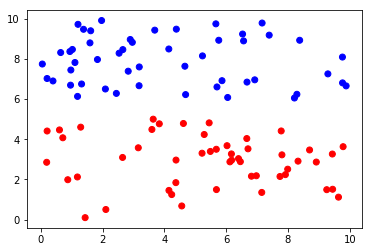

In [2]:
random.seed(0)
xs = list(random.uniform(0, 10, 100))
ys = list(random.uniform(0, 5, 50)) + list(random.uniform(6, 10, 50))
color = [0] * 50 + [1] * 50
linear_df = pd.DataFrame({'x':xs, 'y':ys, 'color':color})
colors = {0:'red', 1:'blue'}
plt.scatter(linear_df['x'], linear_df['y'], c=linear_df['color'].apply(lambda x: colors[x]))
plt.show()

In [3]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

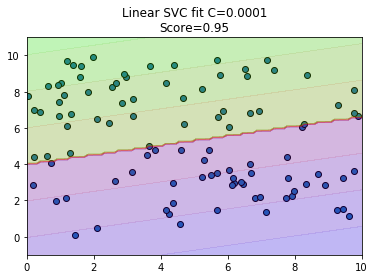

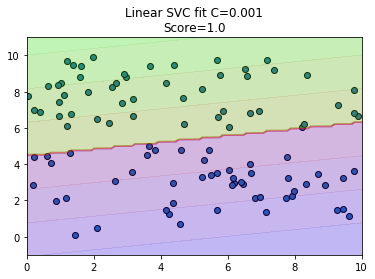

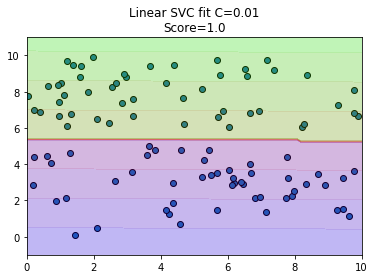

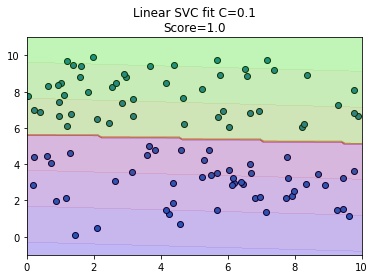

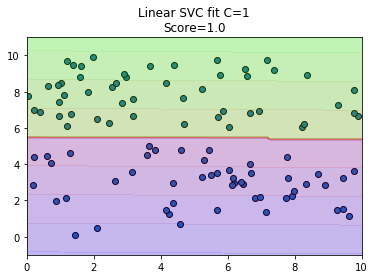

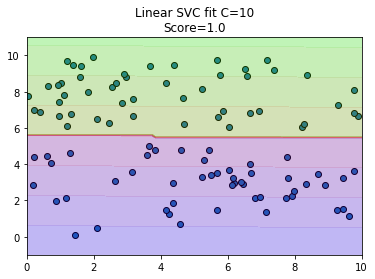

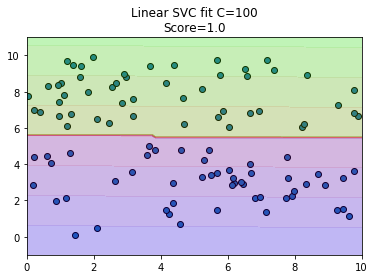

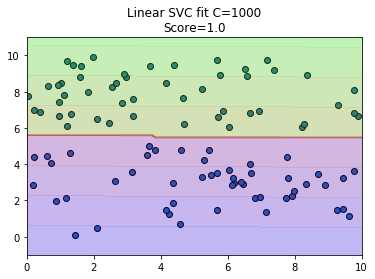

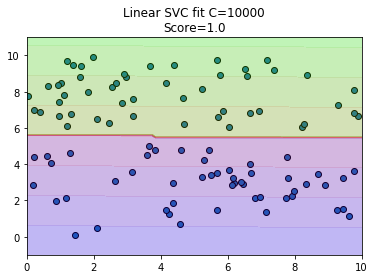

In [4]:
from sklearn.svm import SVC

X = linear_df[['x', 'y']]
y = linear_df['color']
C_list = [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]

for C in C_list:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plt.scatter(linear_df['x'], linear_df['y'], cmap=plt.cm.brg, edgecolor='k')#c=linear_df['color'].apply(lambda x: colors[x]))
    plt.title(f"Linear SVC fit C={C}\nScore={clf.score(X,y)}")
    plot_predictions(clf, [0,10,-1,11])
    plt.show()

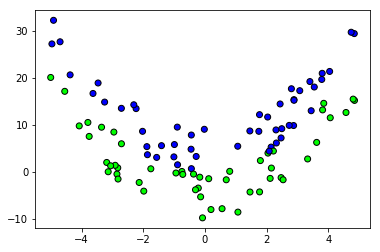

In [5]:
x1 = np.array(random.uniform(-5,5,100))
x2 = []
_class = []
for i in x1:
    rand_mod = random.uniform(-10,10)
    num = i**2 + rand_mod
    x2.append(num)
    if rand_mod >= 0:
        _class.append(0)
    else:
        _class.append(1)
quad_df = pd.DataFrame({'x1':x1, 'x2':x2, 'class':_class})
X = quad_df[['x1', 'x2']]
y = quad_df['class']
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.brg, edgecolor='k')
plt.show()

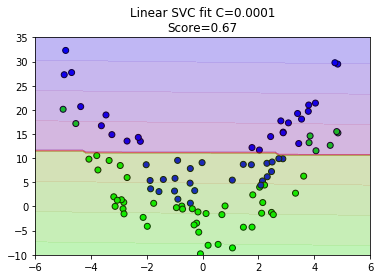

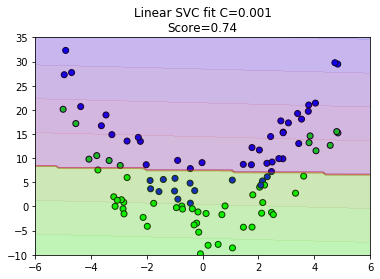

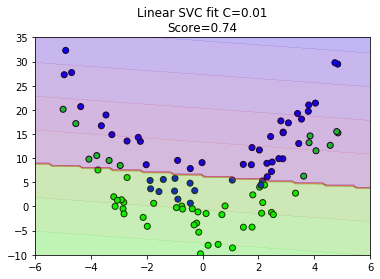

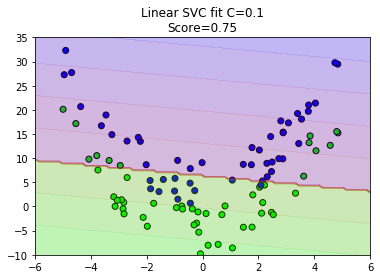

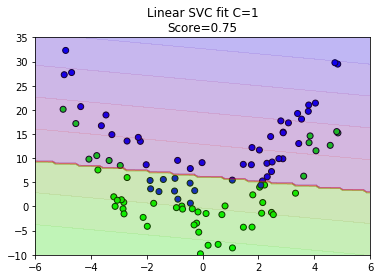

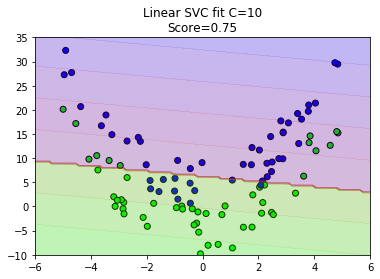

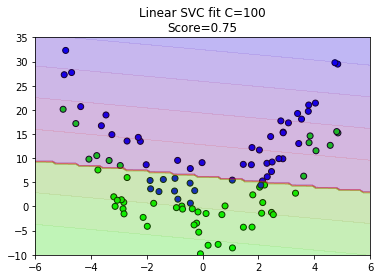

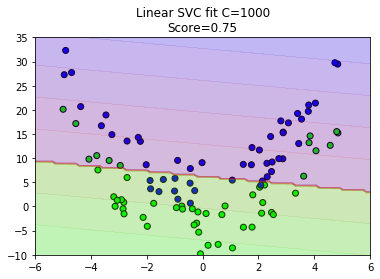

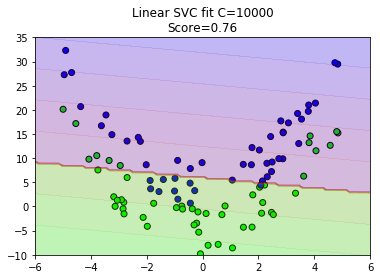

In [6]:
for C in C_list:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.brg, edgecolor='k')
    plt.title(f"Linear SVC fit C={C}\nScore={clf.score(X,y)}")
    plot_predictions(clf, [-6,6,-10,35])
    plt.show()

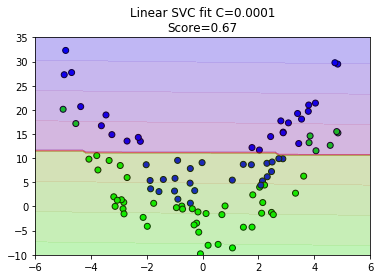

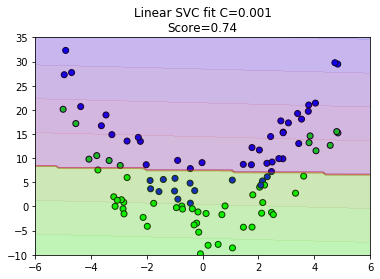

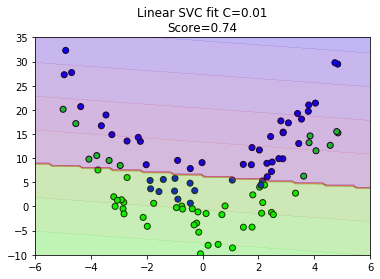

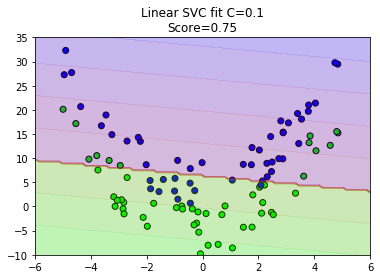

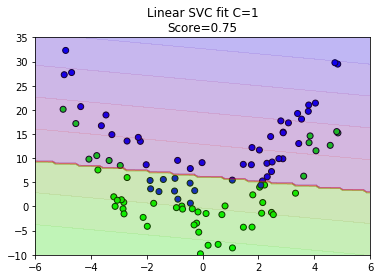

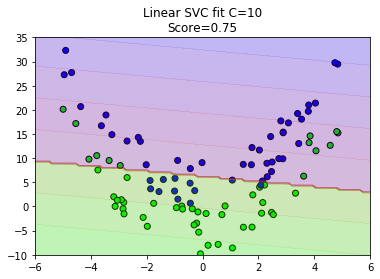

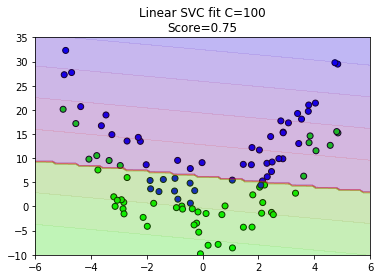

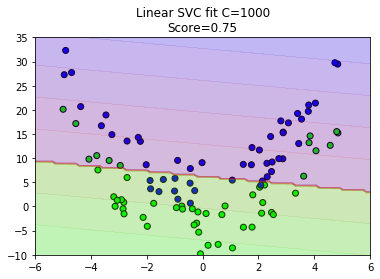

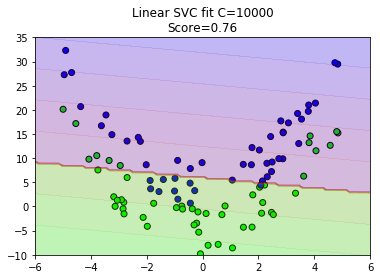

In [7]:
for C in C_list:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.brg, edgecolor='k')
    plt.title(f"Linear SVC fit C={C}\nScore={clf.score(X,y)}")
    plot_predictions(clf, [-6,6,-10,35])
    plt.show()

In [8]:
banknotes = pd.read_csv('data_banknote_authentication.txt', names=['var', 'skew', 'curt', 'entropy', 'class'])
banknotes.head()

,var,skew,curt,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
from sklearn.model_selection import train_test_split

X = banknotes.drop('class', 1)
y = banknotes['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for C in C_list:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    print(f"C: {C}\nScore: {clf.score(X_test, y_test)}")

C: 0.0001
Score: 0.8979591836734694
C: 0.001
Score: 0.9650145772594753
C: 0.01
Score: 0.9795918367346939
C: 0.1
Score: 0.9825072886297376
C: 1
Score: 0.9854227405247813
C: 10
Score: 0.9766763848396501
C: 100
Score: 0.9766763848396501
C: 1000
Score: 0.9766763848396501
C: 10000
Score: 0.9766763848396501


## Non-linear SVM
In the exercise above, we worked with data that was linearly separable and could thus be classified reasonably well with only a linear SVM.  But what if the decision boundary for our data is non-linear?  As it turns out, we can still very effectively use the concepts outlined above, but instead of finding a hyperplane that separates the data, we can use a non-linear kernel function of which `sklearn` provides several.

1. Create a set of 100 random datapoints separated by the boundary given by $f(x) = sin(x)$.  Plot your points, color coding each.
1. Fit 4 SVMs to the data using `linear`, `rbf`, and `poly` kernels of `degree = 2` and `degree = 3`, leaving all other parameters at their default.  Plot the classification and decision boundaries and comment on your results.
1. Choose the most appropriate two models you found in part (2), and generate plots with decision boundaries for different values of the `C` parameter of differing orders of magnitude.
1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Image Segmentation Data Set](http://archive.ics.uci.edu/ml/datasets/Image+Segmentation), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.
1. Fit 4 SVMs to the data using `linear`, `rbf`, and `poly` kernels of `degree = 2` and `degree = 3`, leaving all other parameters at their default, printing the training and testing accuracy for each.  Comment on your results.
1. Repeat part (5), but this time trying different values of the `C` parameter.  Comment on your results.
1. Using `rbf` and `poly` (`degree = 2`) kernels, fit a SVM while trying a few values for the `gamma` parameter, printing the training and testing errors.  Comment on your results. 

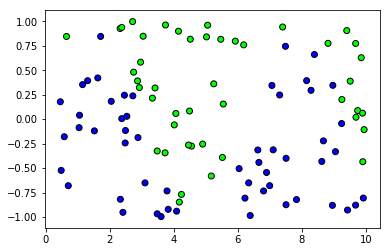

In [10]:
xs = random.uniform(0,10,100)
ys = random.uniform(-1,1,100)
_class = np.where(np.sin(xs) > ys, 0, 1)
linear_df = pd.DataFrame({'x':xs, 'y':ys, 'class':_class})
plt.scatter(xs,ys, c=_class, cmap=plt.cm.brg, edgecolor='k')
plt.show()

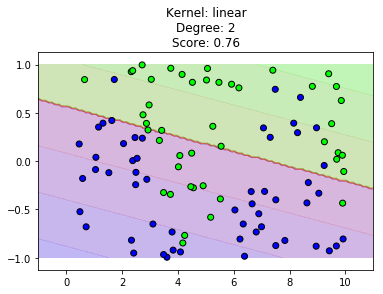

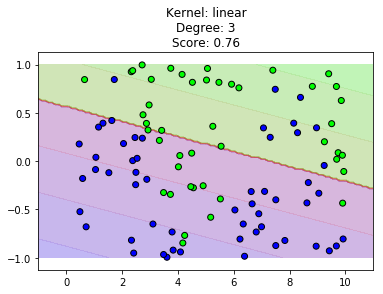

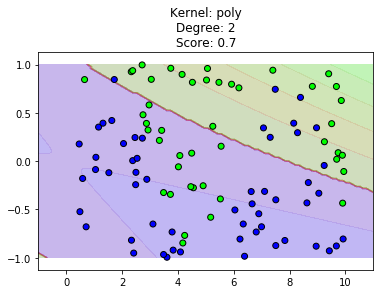

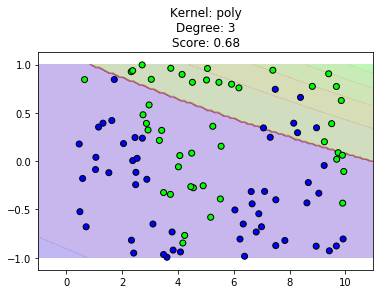

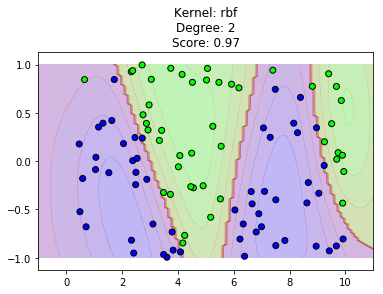

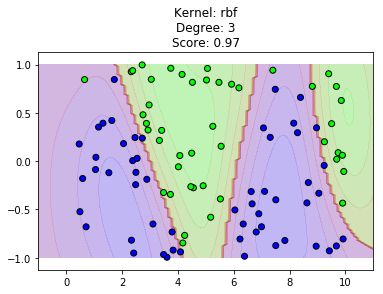

In [11]:
from sklearn.svm import SVC
models = [SVC(kernel='linear', degree=2), SVC(kernel='linear', degree=3), SVC(kernel='poly', degree=2), 
          SVC(kernel='poly', degree=3), SVC(kernel='rbf', degree=2), SVC(kernel='rbf', degree=3)]
X = linear_df[['x', 'y']]
y = linear_df['class']
for model in models:
    model.fit(X, y)
    plt.title(f"Kernel: {model.get_params()['kernel']}\nDegree: {model.get_params()['degree']}\nScore: {model.score(X, y)}")
    plot_predictions(model, [-1,11,-1,1])
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.brg, edgecolor='k')
    plt.show()

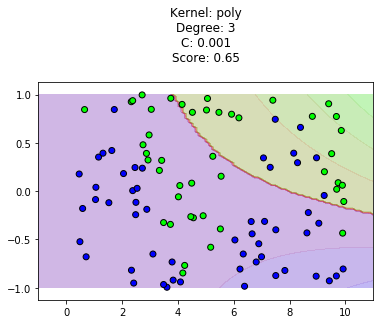

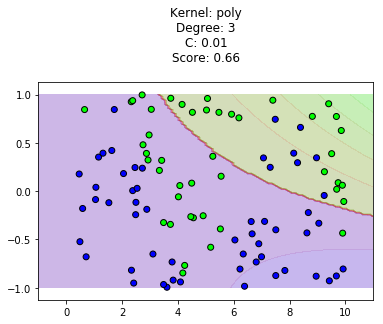

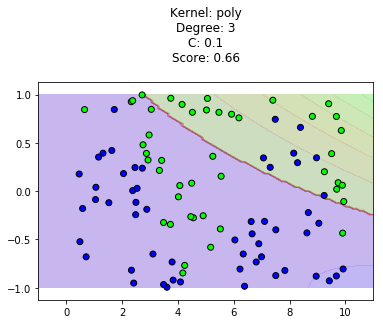

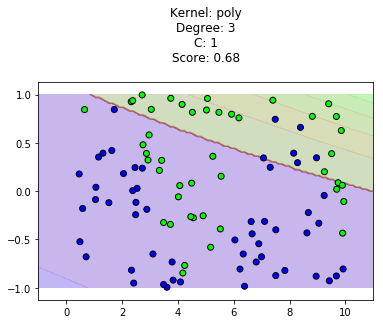

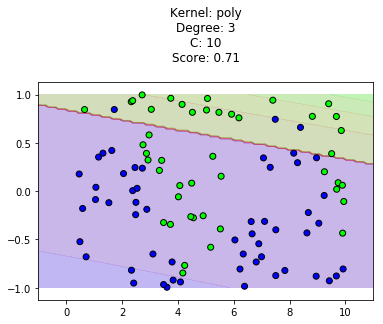

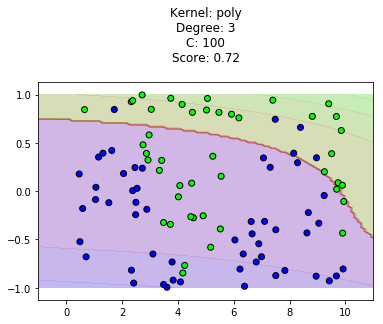

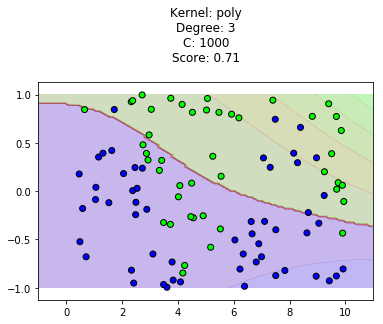

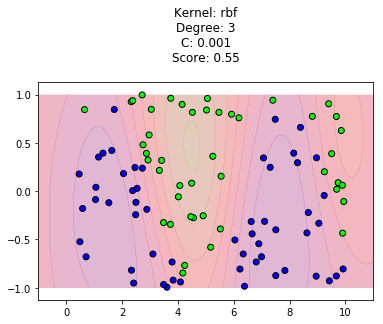

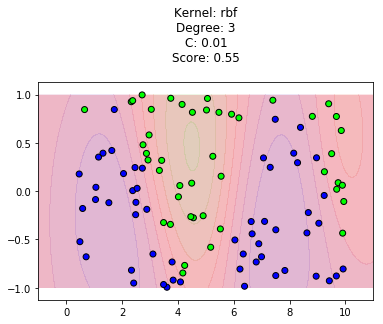

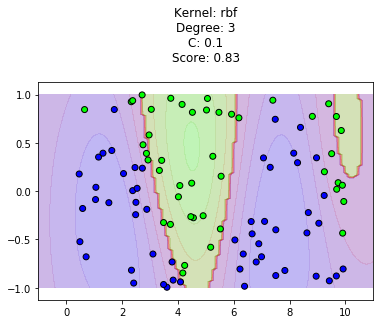

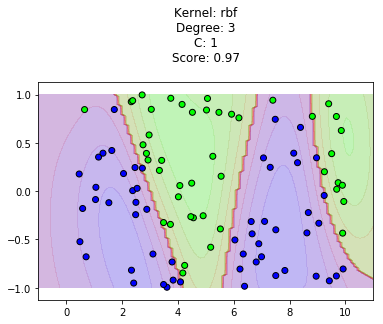

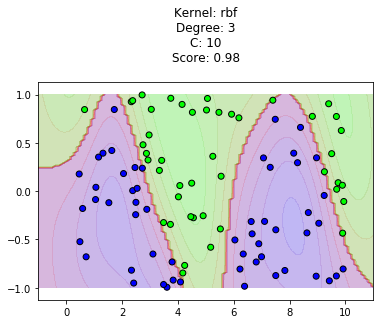

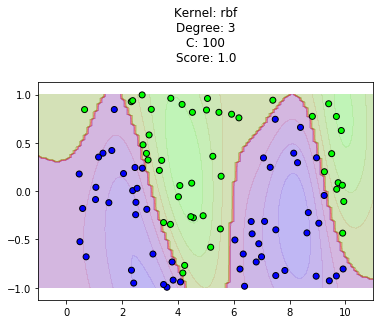

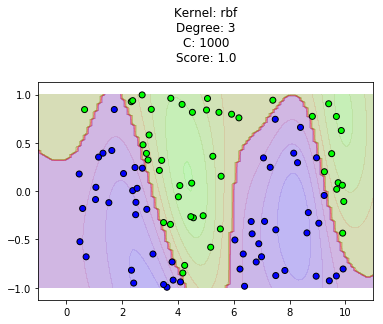

In [12]:
C_list = [.001, .01, .1, 1, 10, 100, 1000]
kernels = ['poly', 'rbf']
degrees = [2, 3]

for kernel in kernels:    
    for C in C_list:
        clf = SVC(kernel=kernel, degree=3, C=C)
        clf.fit(X, y)

        plt.title(f"Kernel: {kernel}\nDegree: {3}\nC: {C}\nScore: {clf.score(X, y)}\n")
        plot_predictions(clf, [-1,11,-1,1])
        plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=plt.cm.brg, edgecolor='k')
        plt.show()

In [13]:
is_train = pd.read_csv('segmentation.data', index_col=False)
is_test = pd.read_csv('segmentation.test', index_col=False)

In [14]:
X_train = is_train.drop('REGION-CENTROID-COL', 1)
y_train = is_train['REGION-CENTROID-COL']
X_test = is_test.drop('REGION-CENTROID-COL', 1)
y_test = is_test['REGION-CENTROID-COL']

In [15]:
C_list = [.001, .01, .1, 1, 10, 100, 1000]
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3]

for kernel in kernels:    
    for degree in degrees:
        clf = SVC(kernel=kernel, degree=degree)
        clf.fit(X_train, y_train)
        print(f"Kernel: {kernel}\nDegree: {degree}\nC: {1}\nTraining Accuracy: {clf.score(X_train, y_train)}\nTesting Accuracy: {clf.score(X_test, y_test)}")

Kernel: linear
Degree: 2
C: 1
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428
Kernel: linear
Degree: 3
C: 1
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428
Kernel: poly
Degree: 2
C: 1
Training Accuracy: 1.0
Testing Accuracy: 0.9247619047619048
Kernel: poly
Degree: 3
C: 1
Training Accuracy: 1.0
Testing Accuracy: 0.9233333333333333
Kernel: rbf
Degree: 2
C: 1
Training Accuracy: 1.0
Testing Accuracy: 0.33285714285714285
Kernel: rbf
Degree: 3
C: 1
Training Accuracy: 1.0
Testing Accuracy: 0.33285714285714285


In [16]:
C_list = [.001, .01, .1, 1, 10, 100, 1000]
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3]

for kernel in kernels:    
    for degree in degrees:
        for C in C_list:
            clf = SVC(kernel=kernel, degree=degree)
            clf.fit(X_train, y_train)
            print(f"Kernel: {kernel}\nDegree: {degree}\nC: {C}\nTraining Accuracy: {clf.score(X_train, y_train)}\nTesting Accuracy: {clf.score(X_test, y_test)}\n")

Kernel: linear
Degree: 2
C: 0.001
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 2
C: 0.01
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 2
C: 0.1
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 2
C: 1
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 2
C: 10
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 2
C: 100
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 2
C: 1000
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 3
C: 0.001
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 3
C: 0.01
Training Accuracy: 0.9857142857142858
Testing Accuracy: 0.9428571428571428

Kernel: linear
Degree: 3

It honestly seems like a C of 1 or 10 is always the best C value.

In [17]:
kernels = ['poly', 'rbf']
gammas = [0.1, 1, 10]

for kernel in kernels:
    for gamma in gammas:
        clf = SVC(kernel=kernel, gamma=gamma)
        clf.fit(X_train, y_train)
        print(f"Kernel: {kernel}\nGamma: {gamma}\nTraining Error: {1-clf.score(X_train, y_train)}\nTesting Error: {1-clf.score(X_test, y_test)}\n")

Kernel: poly
Gamma: 0.1
Training Error: 0.0
Testing Error: 0.07619047619047614

Kernel: poly
Gamma: 1
Training Error: 0.0
Testing Error: 0.07619047619047614

Kernel: poly
Gamma: 10
Training Error: 0.0
Testing Error: 0.07666666666666666

Kernel: rbf
Gamma: 0.1
Training Error: 0.0
Testing Error: 0.6995238095238095

Kernel: rbf
Gamma: 1
Training Error: 0.0
Testing Error: 0.7452380952380953

Kernel: rbf
Gamma: 10
Training Error: 0.0
Testing Error: 0.6861904761904762



The rbf kernel would need a lower gamma due to underfitting, poly might need a higher gamma, it looks like it might be overfitting with the accuracy of the poly kernel exihibited in the past question.

## SVM Regression
As it turns out Support Vector Machines can also be used for regression tasks.  In this exercise, we'll use SVMs for just that on both user generated and real world data.

1. Generate 500 data points for a damped oscillator given by the function $$f(x) = e^{-\beta x}sin(\nu x)$$ on the range $-2\pi < x < 2\pi$, where $\beta =  \frac{1}{2.5}$ and $\nu = 10$.  Plot your function and ensure it looks as expected.
1. Fit a linear regression model to the data in part (1), put the line on the same plot, and report the $R^2$ of the fit, MSE, and coefficients of the fit.
1. Repeat part (2) but using SVM with `linear`, `rbf`, and `poly` kernels of `degree = 2` and `degree = 3`.  Comment on your results.
1. Using a `rbf` kernel, experiment with the `gamma` and `epsilon` parameters to try to fit the function.  Comment on your results.
1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Concrete Slump Test Data Set](http://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.
1. Fit a SVM model to the data, using kernels of your choice, and adjusting the parameters as you see fit.  Report your training and testing errors and compare to a standard linear regression model.  Comment on your results.

In [82]:
# Question 1
x = np.sort(random.uniform(-2 * np.pi, 2 * np.pi, 1000))
beta = 1/2.5
v = 10
y = np.exp(-beta*x) * np.sin(v * x)

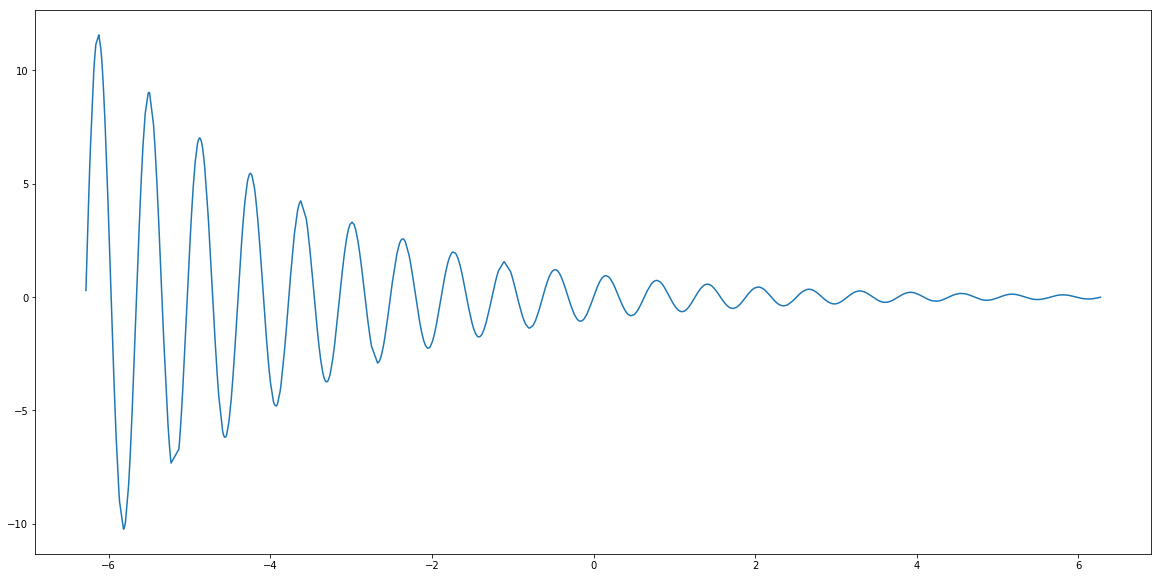

In [83]:
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.show()

MSE: 6.078292211539438
r2: -0.6248562756729834
Coefficient: [[-0.00544178]]


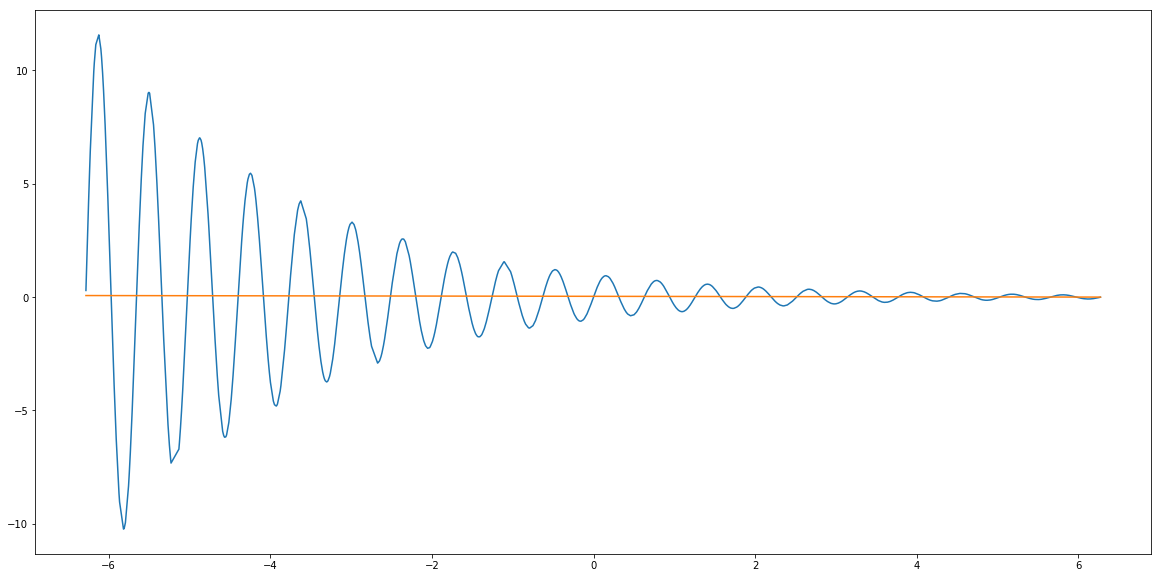

In [86]:
# Question 2
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
svr = SVR(kernel='linear')
svr.fit(X_train.reshape(-1,1), y_train)
print(f"MSE: {mean_squared_error(y_test, svr.predict(X_test.reshape(-1,1)))}")
print(f"r2: {svr.score(y_test.reshape(-1,1), svr.predict(X_test.reshape(-1,1)))}")
print(f"Coefficient: {svr.coef_}")
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.plot(x, svr.predict(x.reshape(-1,1)))
plt.show()

MSE: 6.078292211539438
r2: -0.001429226943045592


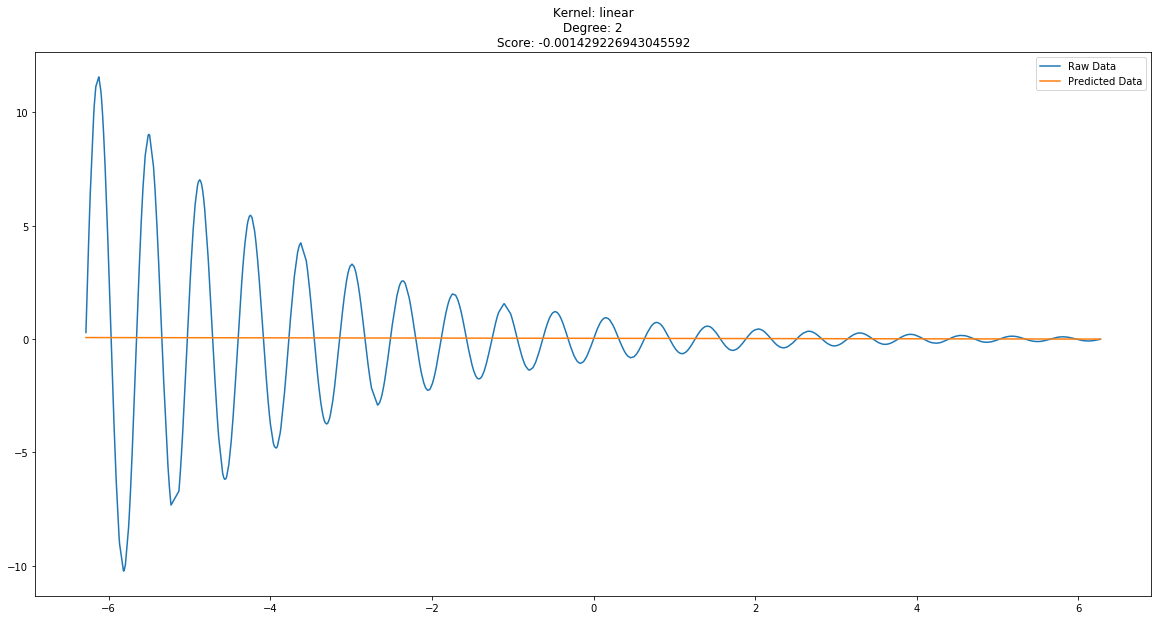

MSE: 6.078292211539438
r2: -0.001429226943045592


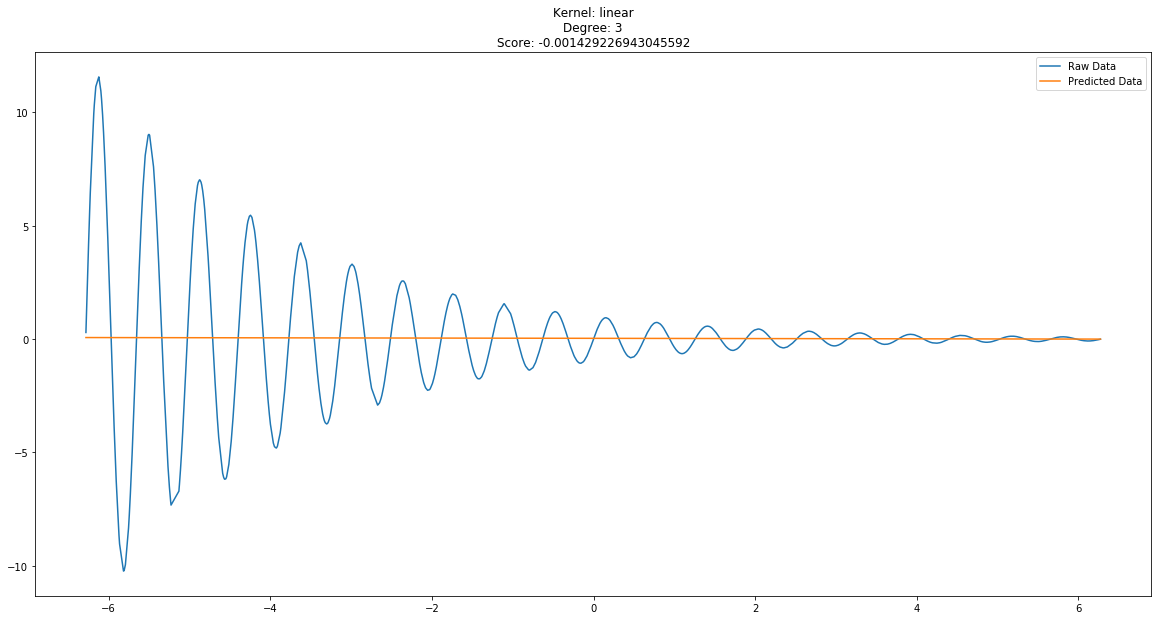

MSE: 6.094762514189784
r2: -0.004142792180883648


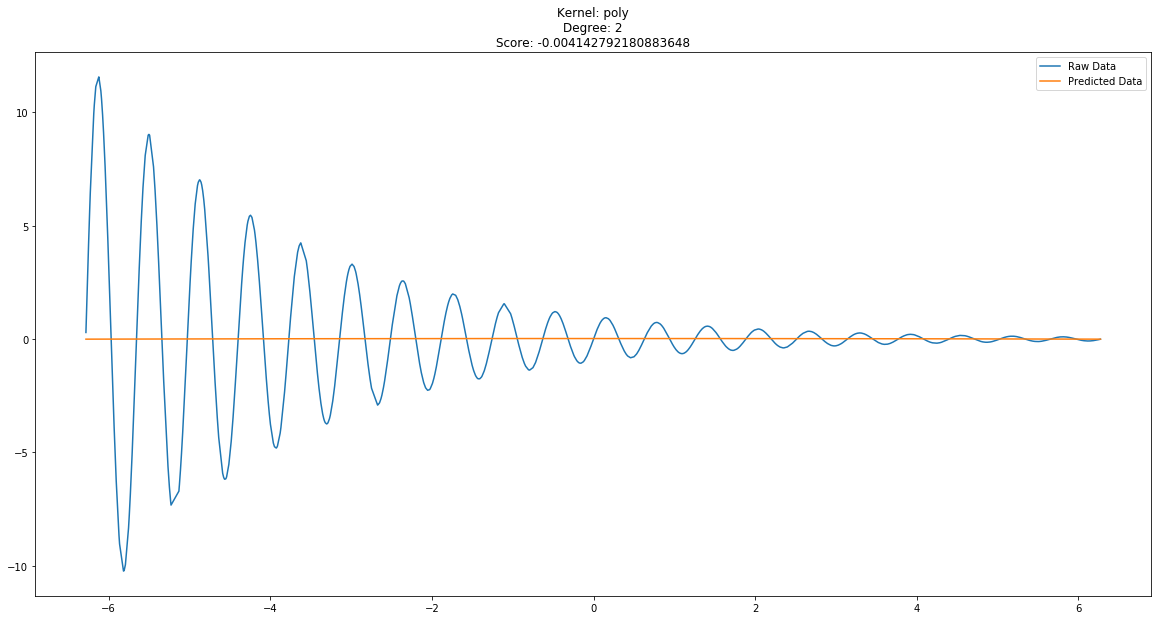

MSE: 6.076633163540944
r2: -0.0011558904372028778


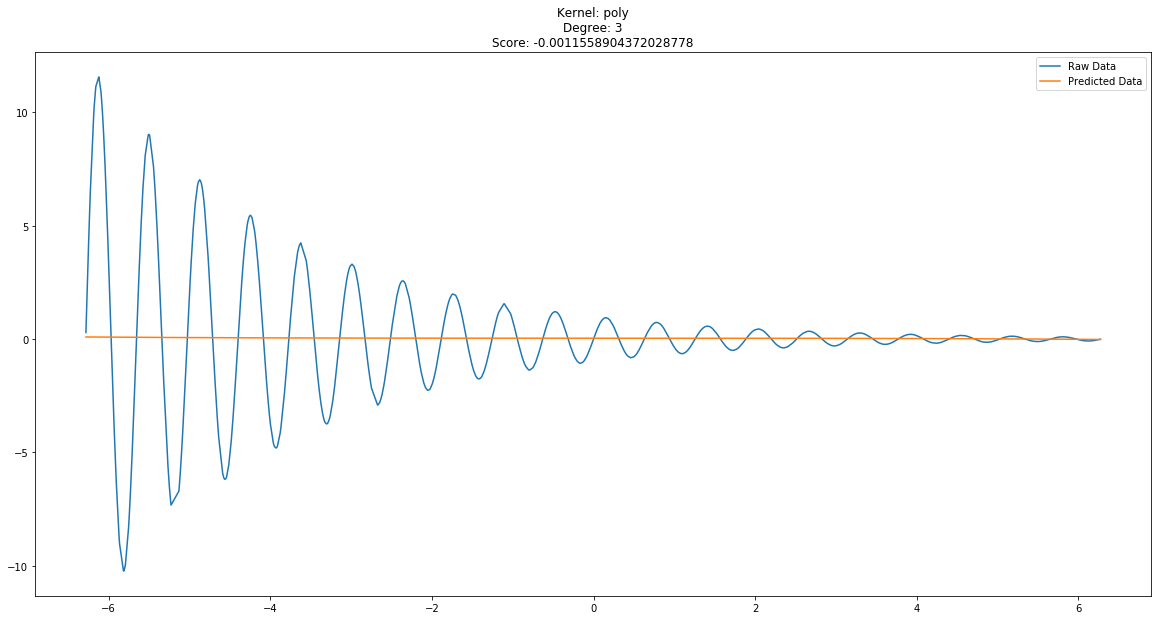

MSE: 6.774613546430388
r2: -0.1161516706551069


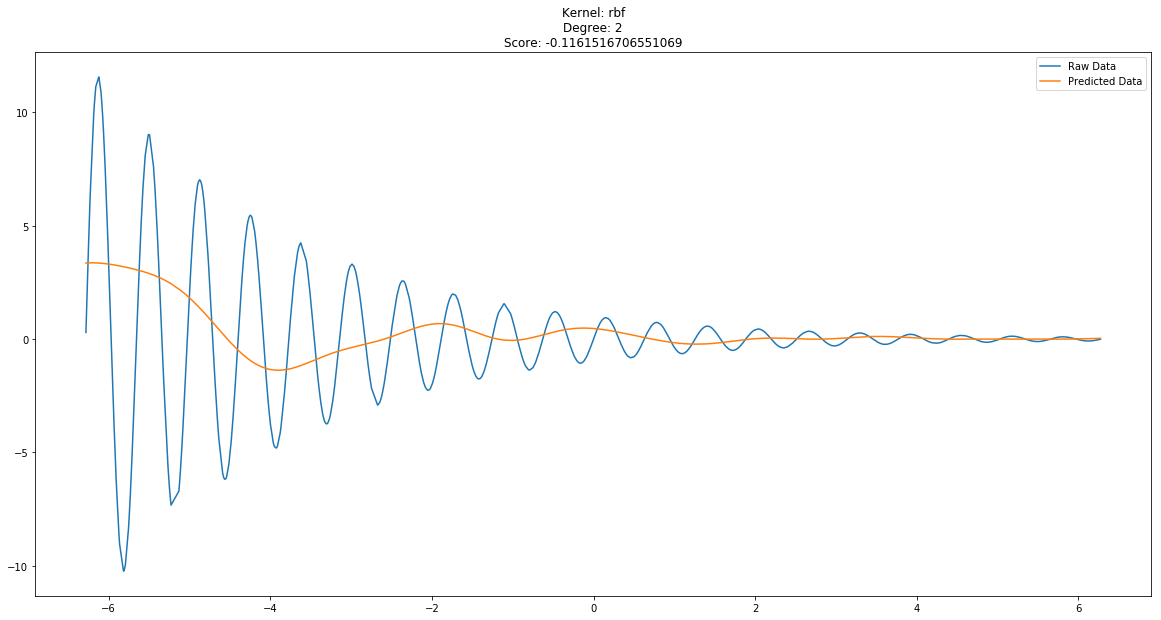

MSE: 6.774613546430388
r2: -0.1161516706551069


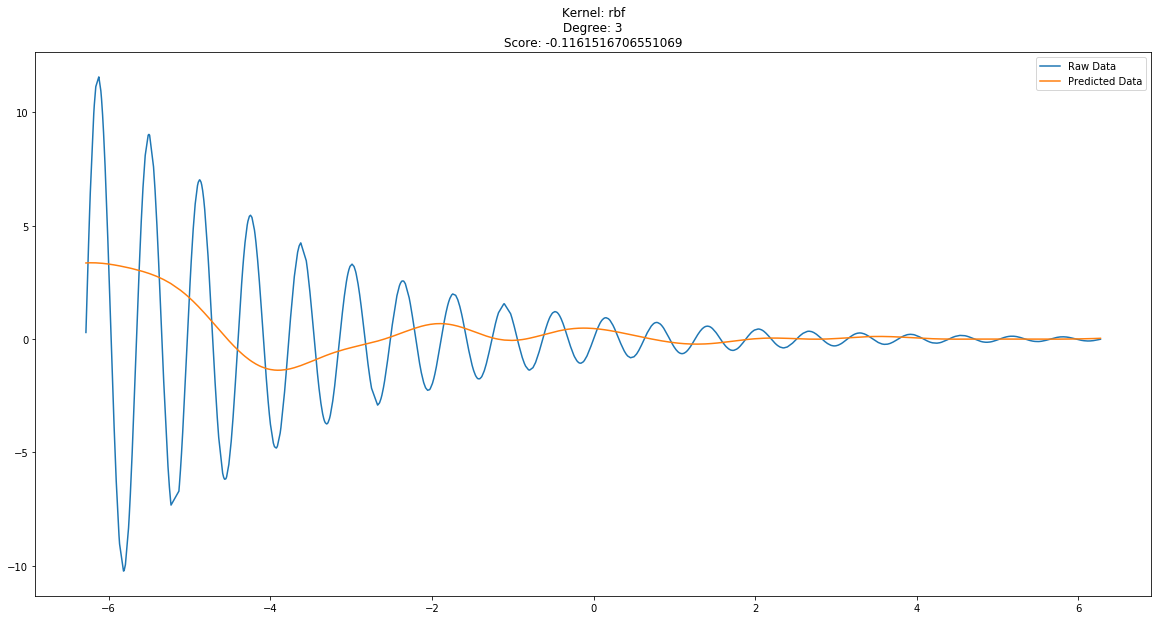

In [87]:
# Question 3
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3]

for kernel in kernels:    
    for degree in degrees:
        svr = SVR(kernel=kernel, degree=degree)
        clf = svr.fit(X_train.reshape(-1,1), y_train)
        print(f"MSE: {mean_squared_error(y_test, svr.predict(X_test.reshape(-1,1)))}")
        print(f"r2: {clf.score(X_test.reshape(-1, 1), y_test)}")
        plt.figure(figsize=(20,10))
        plt.title(f"Kernel: {kernel}\nDegree: {degree}\nScore: {clf.score(X_test.reshape(-1, 1), y_test)}")
        plt.plot(x, y, label='Raw Data')
        plt.plot(x, clf.predict(x.reshape(-1,1)), label='Predicted Data')
        plt.legend()
        plt.show()

Linear is a very bad model for this data, regardless of the parameters. RBF gets closer, but may need some adjusting.

MSE: 6.277963932866489


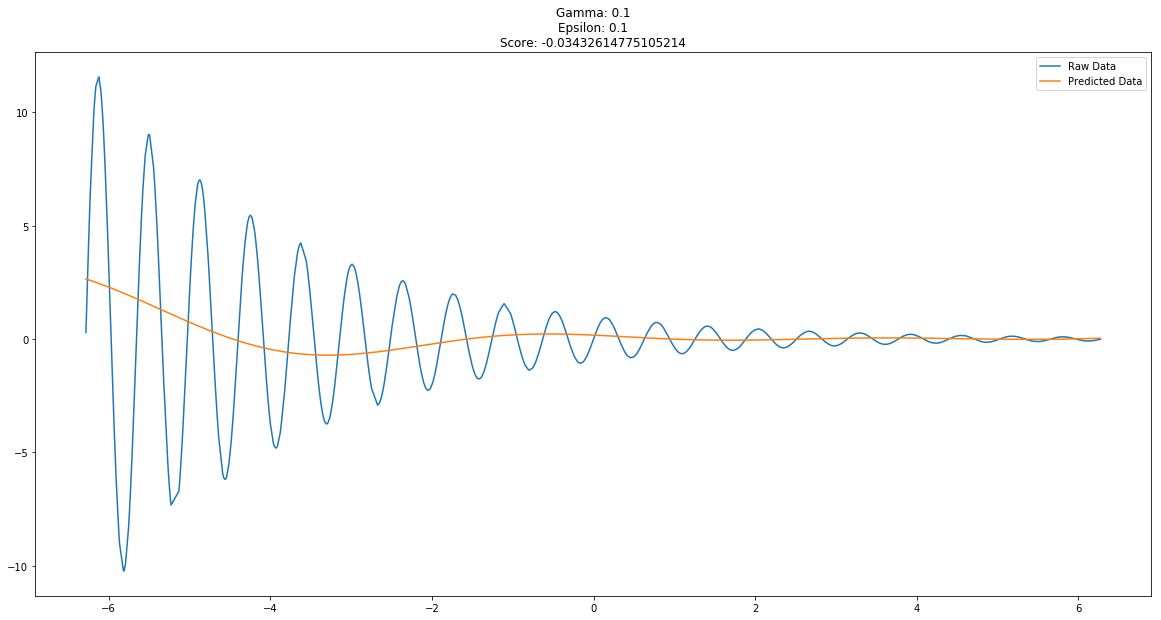

MSE: 6.398976365224454


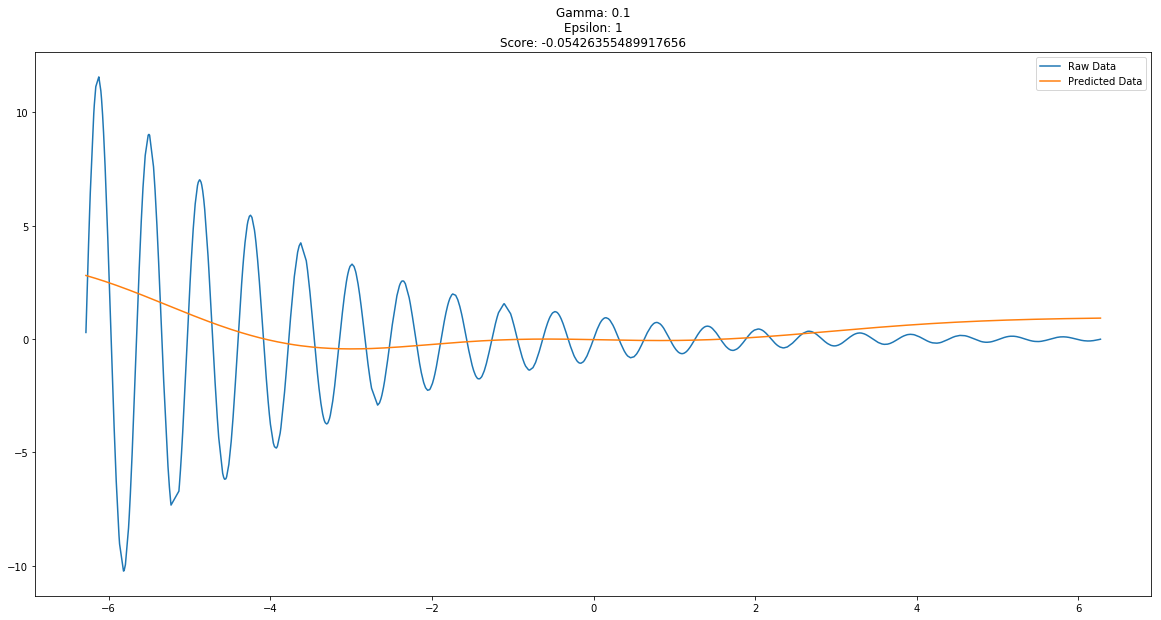

MSE: 6.709941376462085


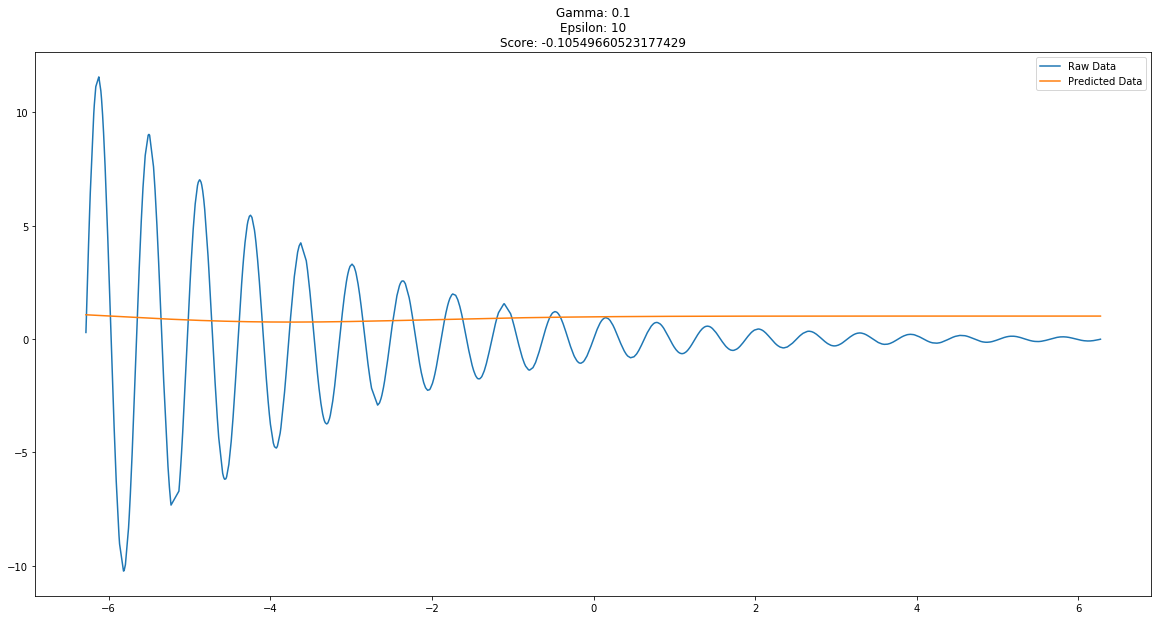

MSE: 6.774613546430388


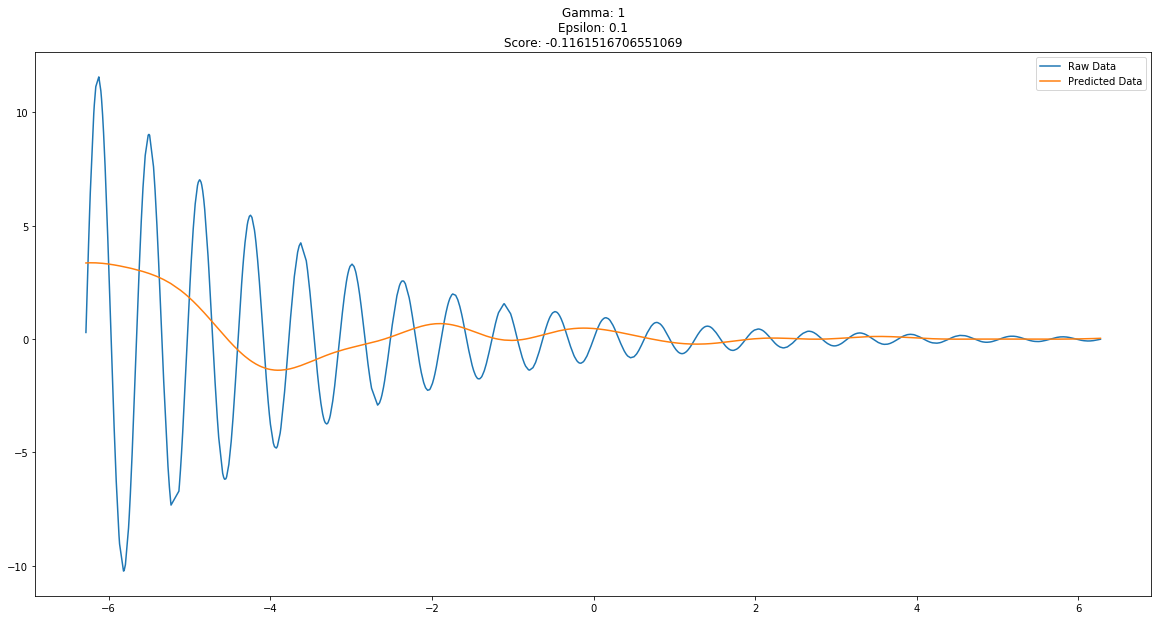

MSE: 6.812842853170334


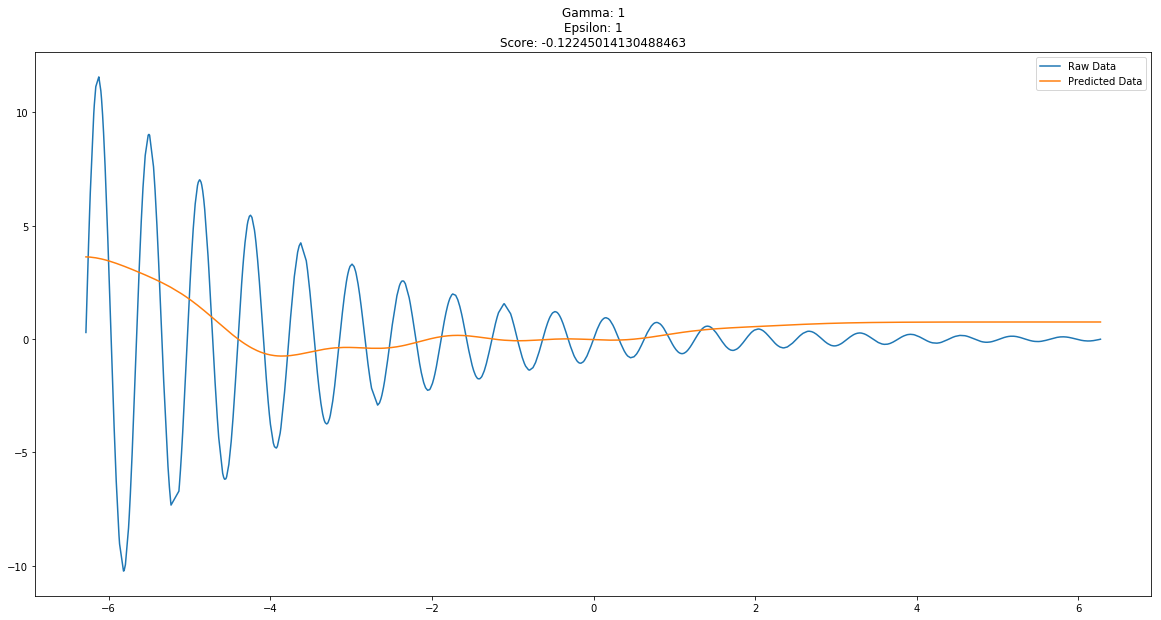

MSE: 6.402569159697232


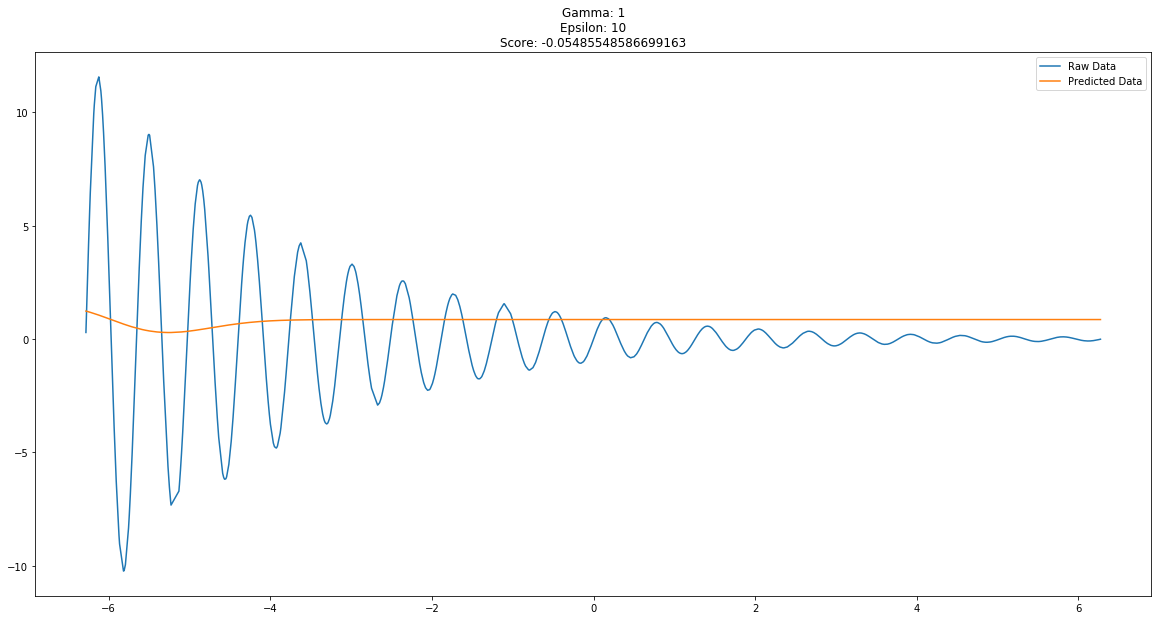

MSE: 1.9075154233382958


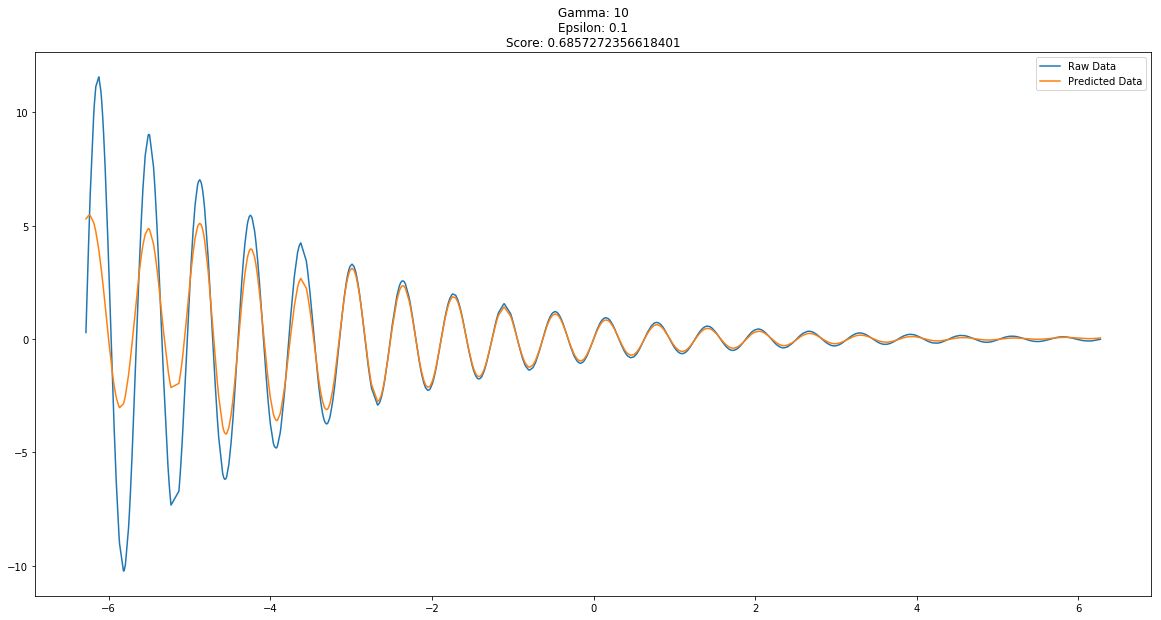

MSE: 2.2802781397092473


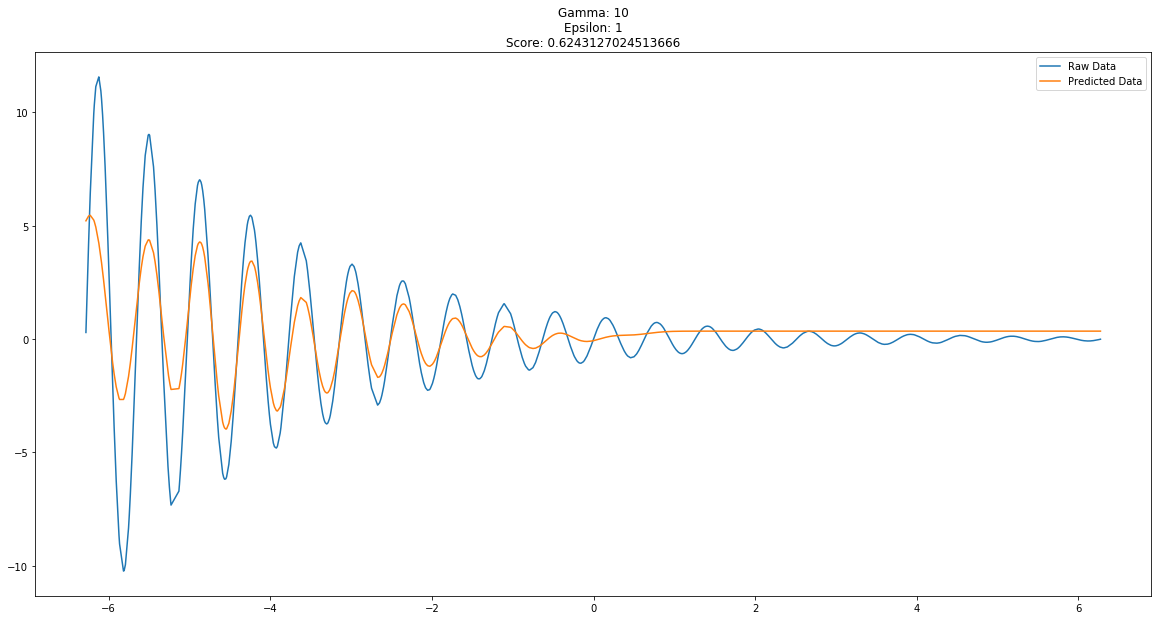

MSE: 5.884611428652086


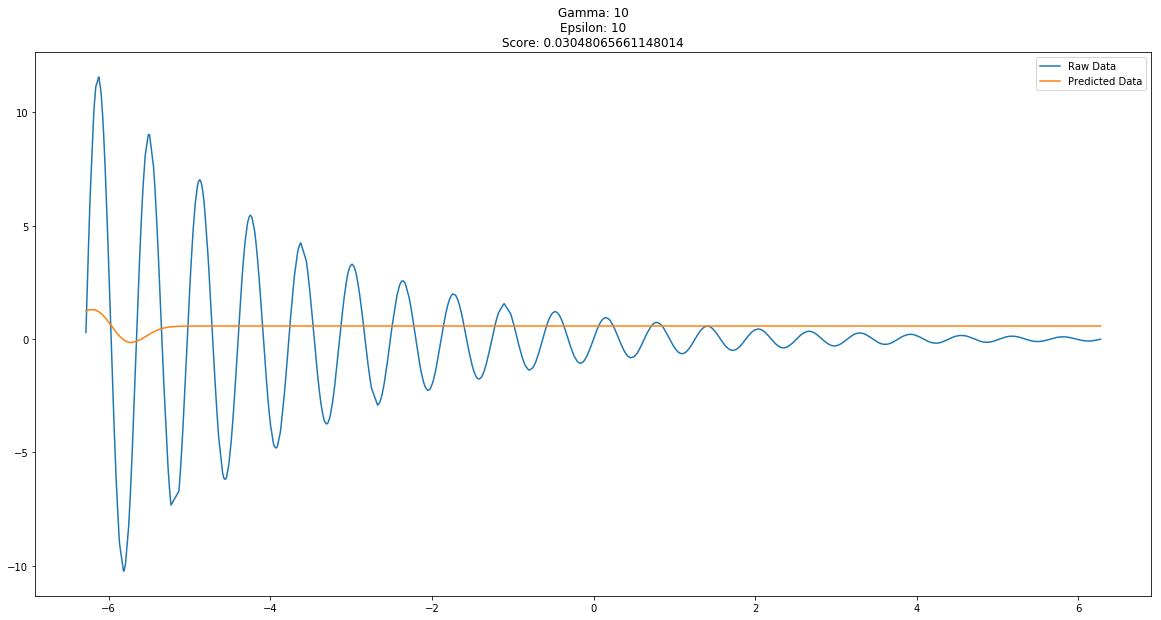

In [88]:
# Question 4
gammas = [0.1, 1, 10]
epsilons = [0.1, 1, 10]

for gamma in gammas:
    for epsilon in epsilons:
        svr = SVR(kernel='rbf', gamma=gamma, epsilon=epsilon)
        clf = svr.fit(X_train.reshape(-1,1), y_train)
        print(f"MSE: {mean_squared_error(y_test, svr.predict(X_test.reshape(-1,1)))}")
        plt.figure(figsize=(20,10))
        plt.title(f"Gamma: {gamma}\nEpsilon: {epsilon}\nScore: {clf.score(X_test.reshape(-1, 1), y_test)}")
        plt.plot(x, y, label='Raw Data')
        plt.plot(x, clf.predict(x.reshape(-1,1)), label='Predicted Data')
        plt.legend()
        plt.show()

Gamma 10 and Epsilons 0.1 and 1 are the only models that actually resemble the function.

In [23]:
# Question 5
concrete = pd.read_csv('slump_test.data')
concrete.drop('No', 1, inplace=True)
concrete.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


There are 3 output variables, just randomly choosing Compressive Strength

In [66]:
# Question 6
X = concrete.drop(['SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)'], 1)
y = concrete['Compressive Strength (28-day)(Mpa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3]
gammas = [0.1, 1, 10]
epsilons = [0.1, 1, 10]
Cs = [1, 10]
svr = SVR(kernel='linear')
clf = svr.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
test_error = mean_squared_error(y_test, clf.predict(X_test))
train_score = clf.score(X_train, y_train)
train_error = mean_squared_error(y_train, clf.predict(X_train))
print("Standard Linear SVR:\n")
print(f"Training r2: {train_score}\nTraining Error: {train_error}")
print(f"Testing r2: {test_score}\nTesting Error: {test_error}")

Standard Linear SVR:

Training r2: 0.9114966885902056
Training Error: 5.171947660341707
Testing r2: 0.8455007304244913
Testing Error: 10.496847878679997


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = {'kernel':('linear', 'poly', 'rbf'),
             'C':[1, 10],
             'degree':[2, 3],
             'gamma':[10],
             'epsilon': [1]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
grid = clf.fit(X_train, y_train)

In [78]:
results = pd.DataFrame(grid.cv_results_)
print("The best model is: {}".format(clf.best_estimator_))

The best model is: SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma=10,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [79]:
svr = grid.best_estimator_
clf = svr.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
test_error = mean_squared_error(y_test, clf.predict(X_test))
train_score = clf.score(X_train, y_train)
train_error = mean_squared_error(y_train, clf.predict(X_train))
print("Best SVR model score:\n")
print(f"Training r2: {train_score}\nTraining Error: {train_error}")
print(f"Testing r2: {test_score}\nTesting Error: {test_error}")

Best SVR model score:

Training r2: 0.9919484248545876
Training Error: 0.4705171430542957
Testing r2: 0.980971536633046
Testing Error: 1.2928144312703793


Looks to be much better accuracy than the linear model, but may be overfitting.